In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import cPickle

In [2]:
from sklearn.linear_model import RidgeCV

In [3]:
sns.set(style="ticks", context="talk", font='sans-serif')

%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

### Load the data...

In [4]:
cd CollegeScorecard_Raw_Data/

/home/vagrant/datacourse/Capstone/CollegeScorecard_Raw_Data


In [5]:
modelData2011 = cPickle.load(open('modelData2011.pkl', 'rb'))
modelData = modelData2011.dropna(axis=0, how='any')

### From here onwards it will be "modelData"...

In [6]:
modelData.describe()

UnivID          Cost    TuitionFTE  ExpenditureFTE  \
count     411.000000    411.000000    411.000000      411.000000   
mean   179417.708029  32951.160584  12778.462287    10059.676399   
std     40987.219260  11945.100213   6282.742661     8266.194733   
min    100858.000000   8986.000000   1969.000000     1324.000000   
25%    150765.000000  22013.000000   7682.500000     6292.000000   
50%    180416.000000  33698.000000  12268.000000     7927.000000   
75%    212146.500000  41208.000000  16551.000000    10552.500000   
max    433660.000000  56641.000000  31562.000000    84831.000000   

       AvgFacultySal  UGEnrollment        Math      Verbal     Writing  \
count     411.000000    411.000000  411.000000  411.000000  411.000000   
mean     7204.888078   4379.761557  533.647202  528.982968  518.321168   
std      1879.884841   6237.323126   76.023582   70.502497   75.791589   
min      3364.000000    230.000000  355.000000  365.000000  350.000000   
25%      5890.000000   1363.000000  485.000000  480.000000  467.500000   
50%      6802.000000   2240.000000  520.000000  515.000000  505.000000   
75%      8163.000000   4635.500000  570.000000  570.000000  555.000000   
max     15866.000000  66864.000000  780.000000  745.000000  745.000000   

       PercentPell    MedianDebt  INC_PCT_M1  INC_PCT_M2  INC_PCT_H1  \
count   411.000000    411.000000  411.000000  411.000000  411.000000   
mean      0.361793  16704.463504    0.149557    0.168900    0.155779   
std       0.144354   3845.232425    0.028567    0.033451    0.045382   
min       0.078500   5000.000000    0.078925    0.066667    0.015560   
25%       0.261250  14250.000000    0.131955    0.146736    0.126766   
50%       0.351000  17000.000000    0.148454    0.167423    0.158537   
75%       0.442800  19250.000000    0.168193    0.190307    0.186672   
max       0.891000  25000.000000    0.273834    0.282642    0.288433   

       INC_PCT_H2            E50  
count  411.000000     411.000000  
mean     0.176329   48662.530414  
std      0.101384   14265.168475  
min      0.000000   26400.000000  
25%      0.094354   39700.000000  
50%      0.155918   45300.000000  
75%      0.246066   53300.000000  
max      0.452468  128400.000000

In [7]:
np.isfinite(modelData['ExpenditureFTE']).describe()

count     411
mean        1
std         0
min      True
25%         1
50%         1
75%         1
max      True
Name: ExpenditureFTE, dtype: object

In [12]:
modelData['SATAvg'] = modelData[['Math','Verbal','Writing']].mean(axis=1)

/opt/conda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
list(modelData.columns)

['UnivID',
 'College',
 'CollegeType',
 'Cost',
 'TuitionFTE',
 'ExpenditureFTE',
 'AvgFacultySal',
 'UGEnrollment',
 'Math',
 'Verbal',
 'Writing',
 'PercentPell',
 'MedianDebt',
 'INC_PCT_M1',
 'INC_PCT_M2',
 'INC_PCT_H1',
 'INC_PCT_H2',
 'E50',
 'SATAvg']

In [15]:
features = [
 'CollegeType',
 'TuitionFTE',
 'ExpenditureFTE',
 'AvgFacultySal',
 'UGEnrollment',
 'Math',
 'Verbal',
 'Writing',
 'PercentPell',
 'INC_PCT_M1',
 'INC_PCT_M2',
 'INC_PCT_H1',
 'INC_PCT_H2',
 'SATAvg']
X = modelData[features]
y = modelData['E50']

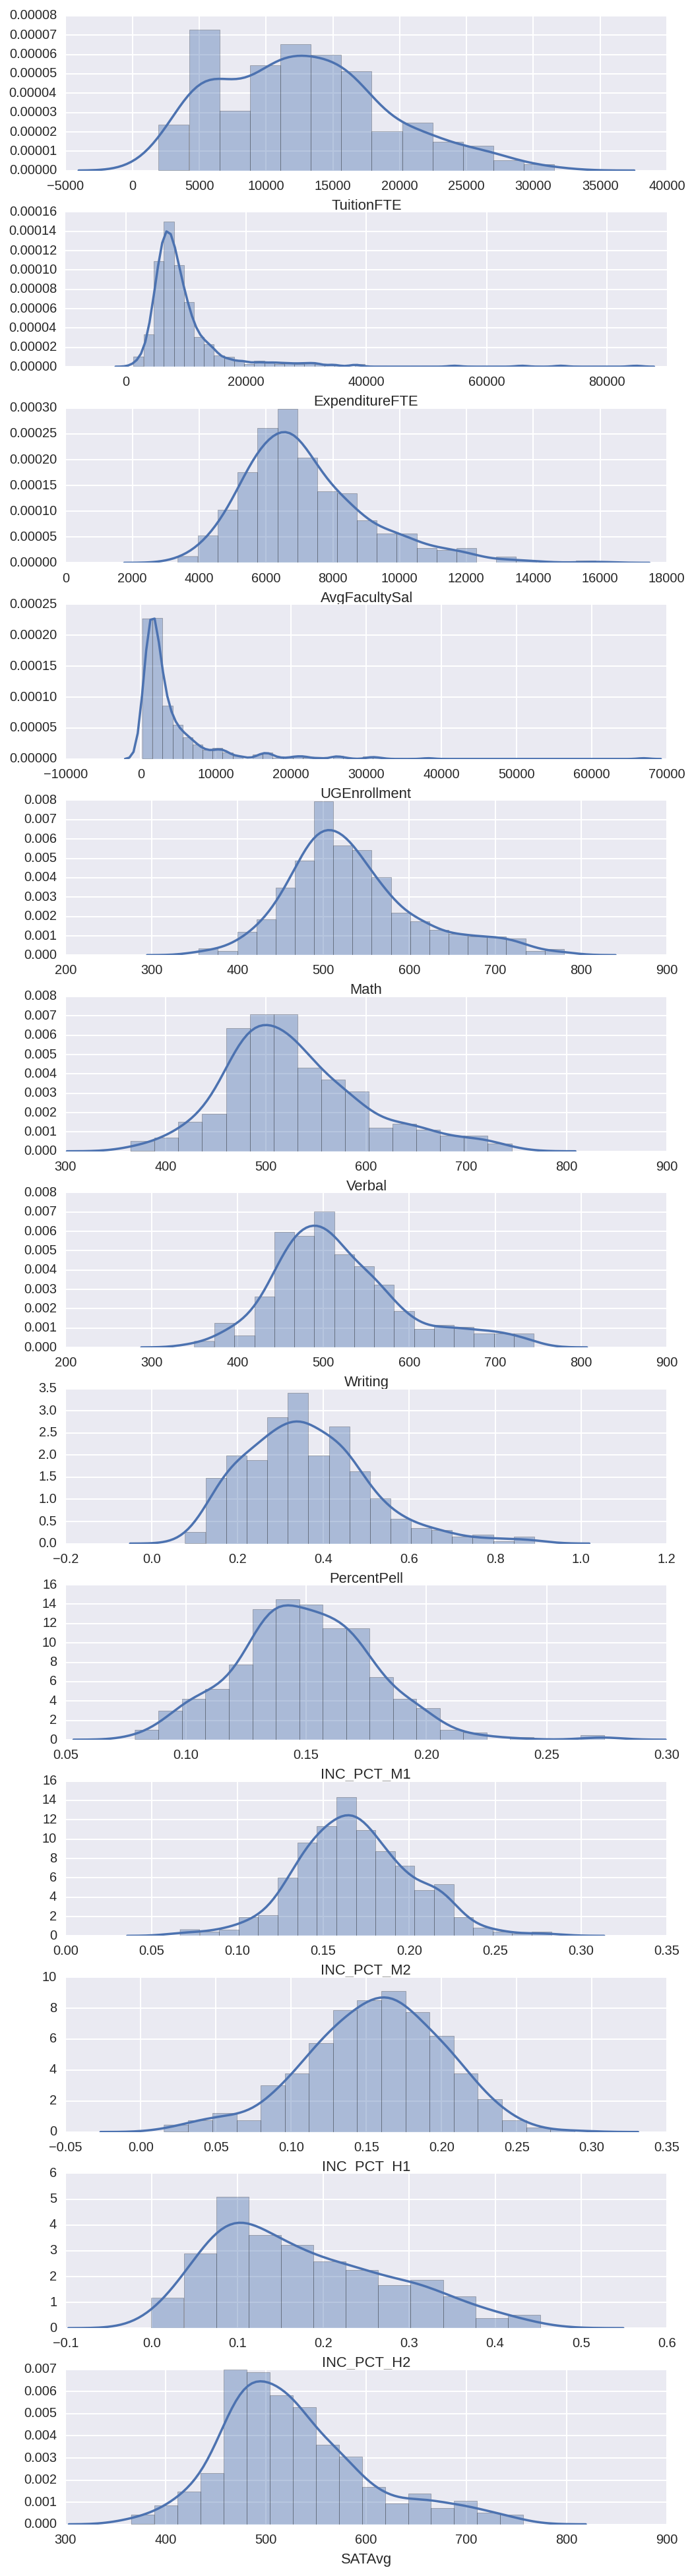

In [16]:
sns.set()
f, axes = plt.subplots(len(X.columns)-1, figsize=(7, 27))
plt.tight_layout()
for i, name in enumerate(features[1:]):
    sns.distplot(X[name], ax = axes[i], label= "%s" %(name))

In [ ]:
LinReg0 = LinearRegression()
#Cross-validate!
y_pred = cross_val_predict(LinRego, X, y, cv=20)

fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

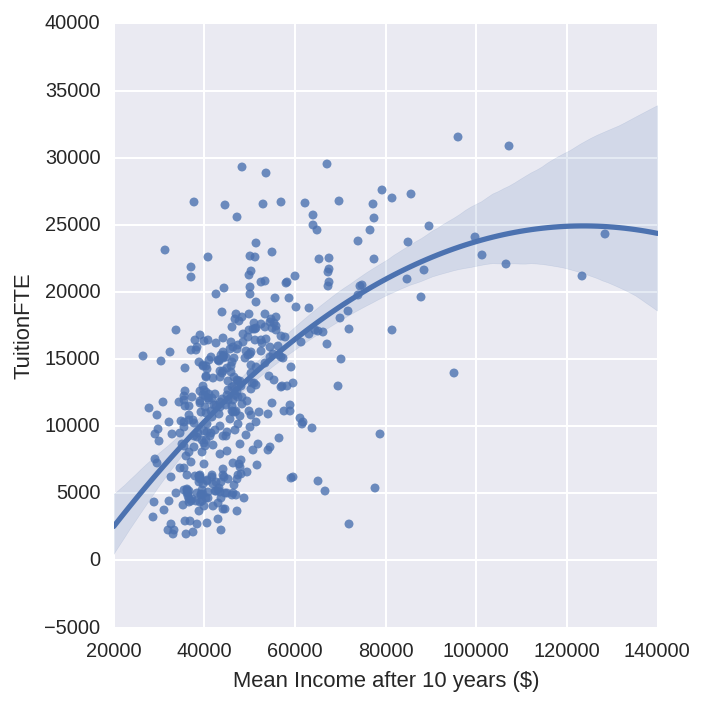

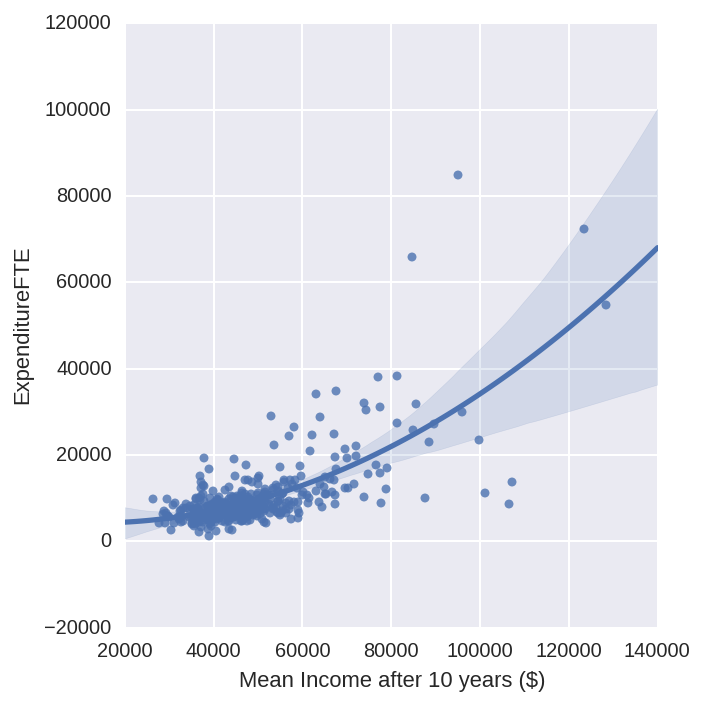

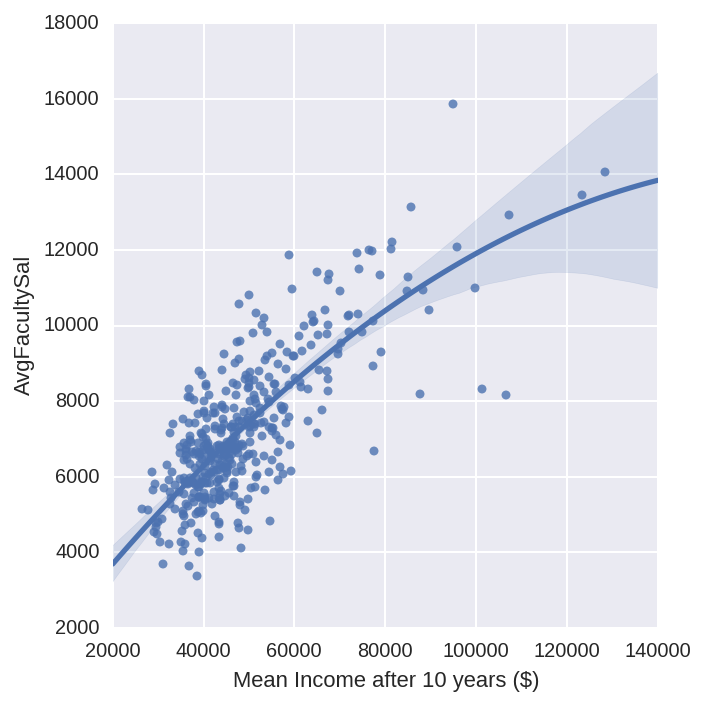

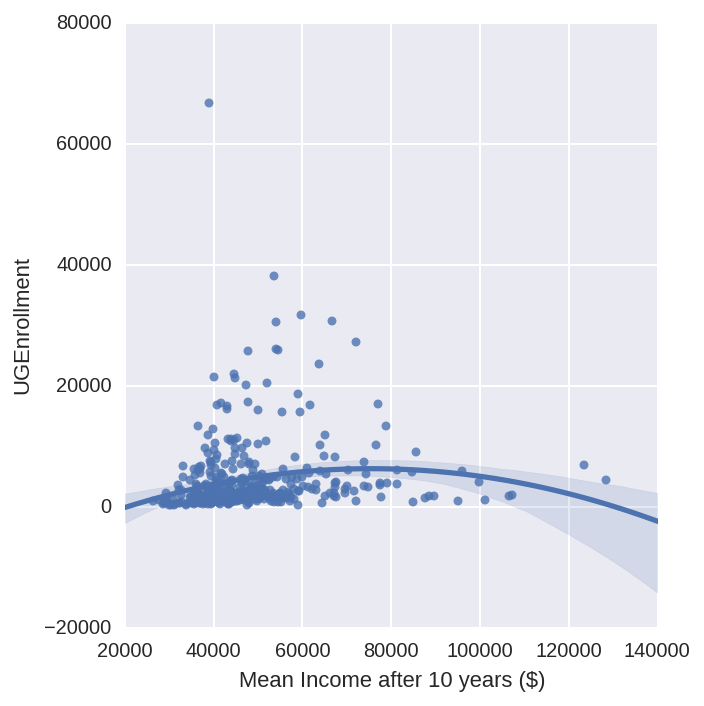

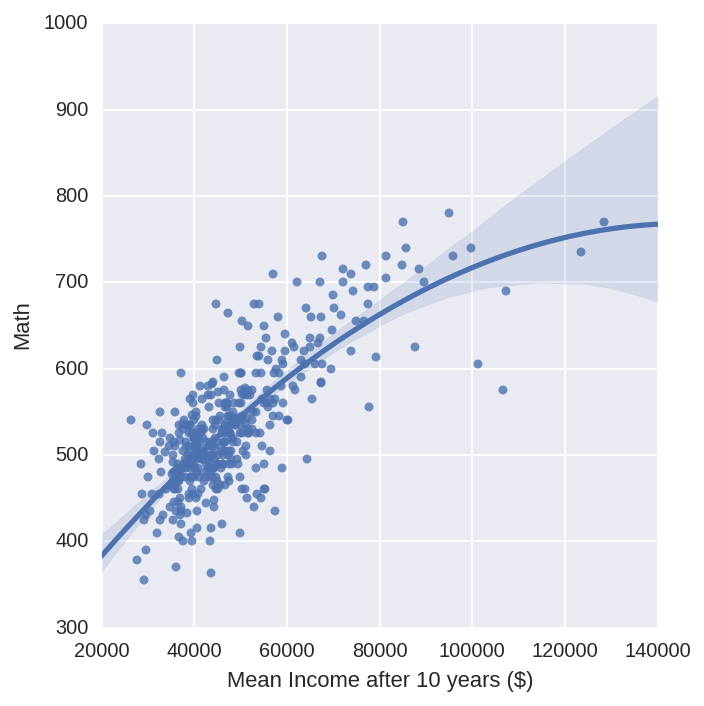

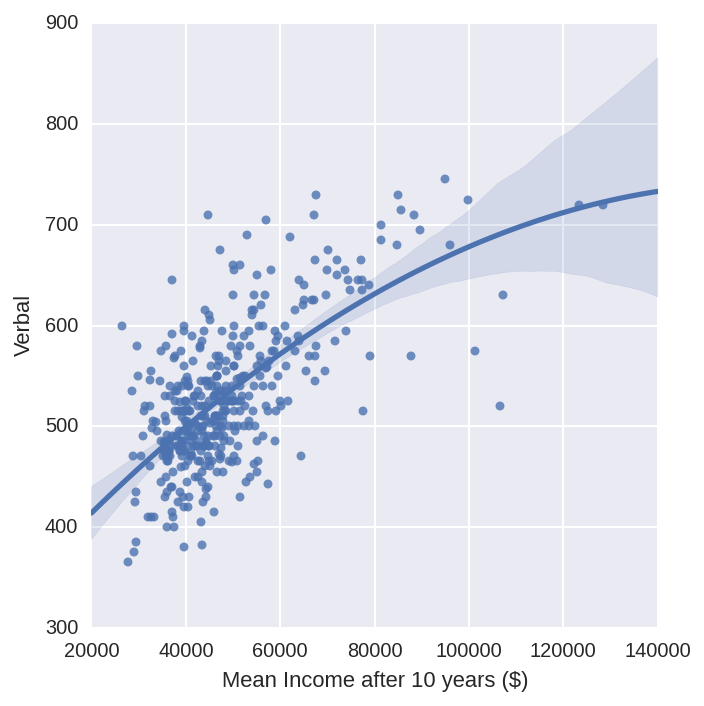

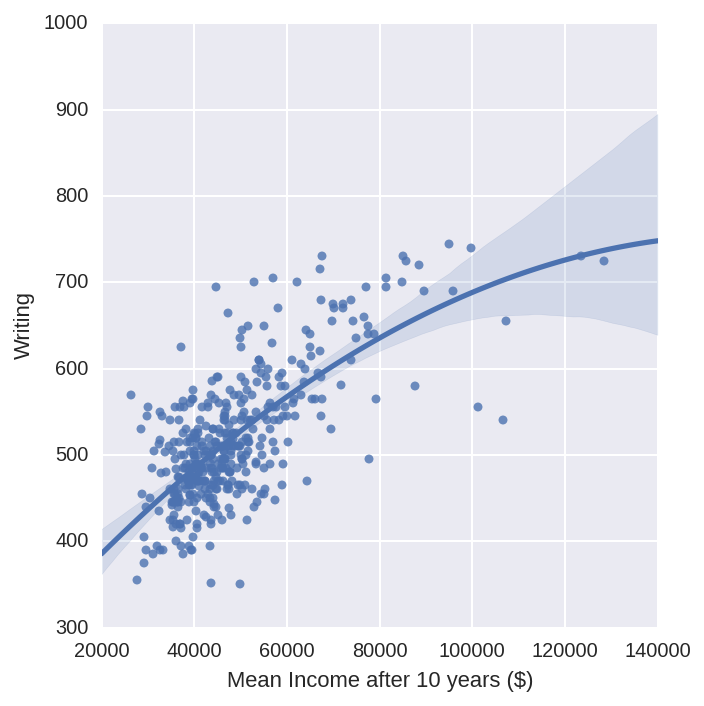

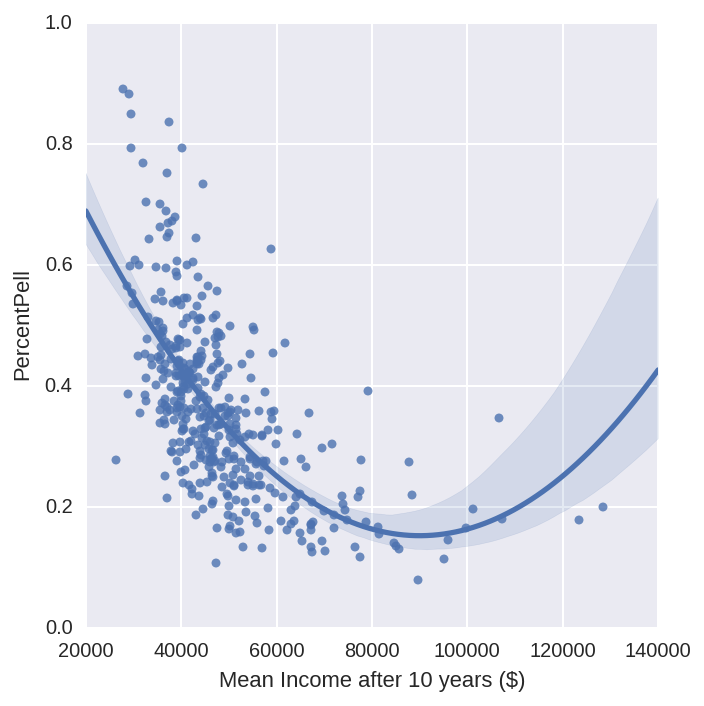

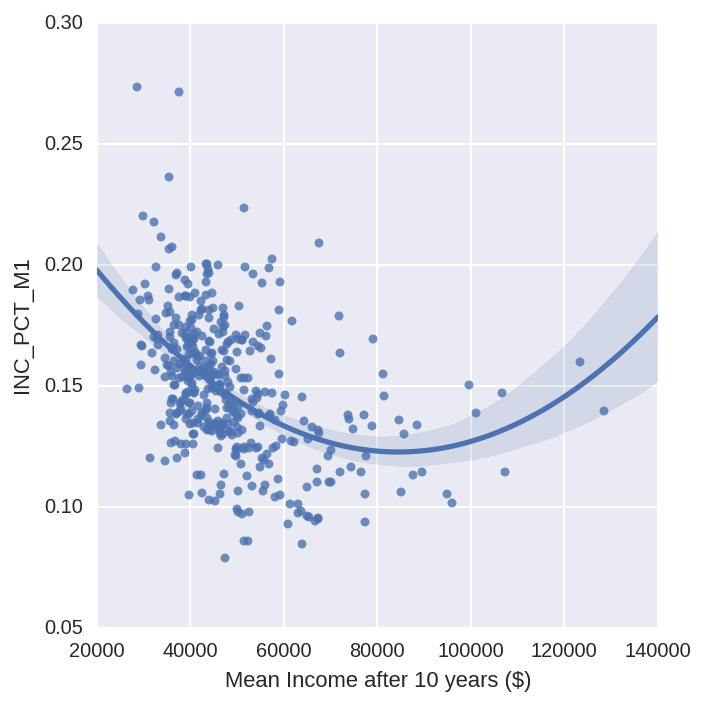

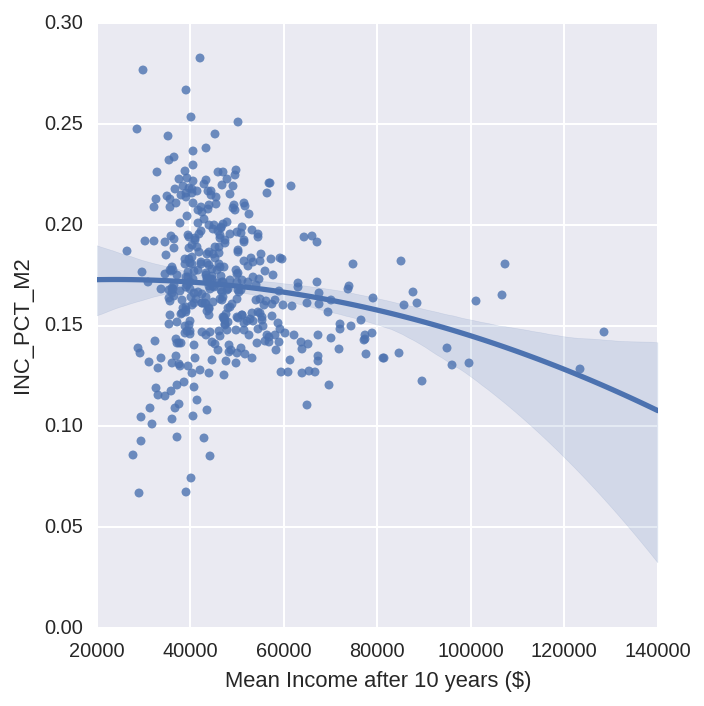

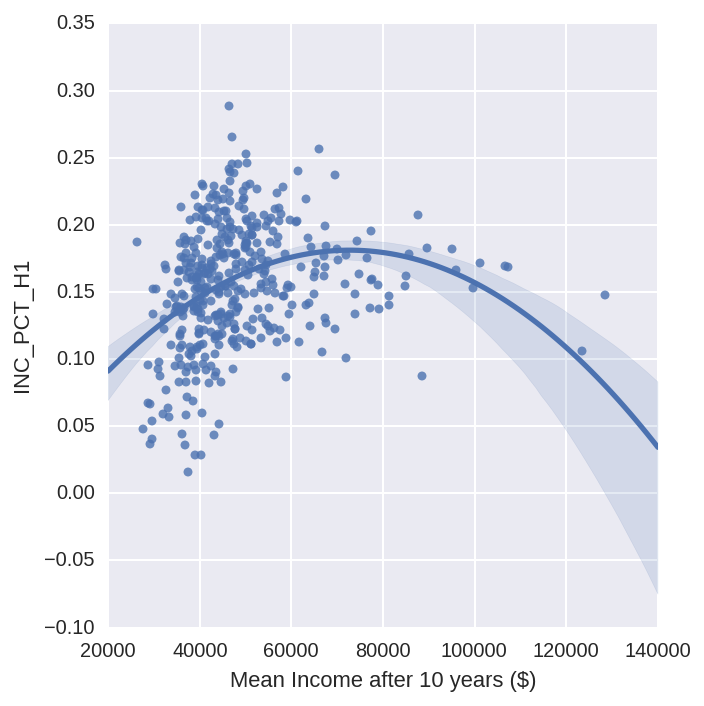

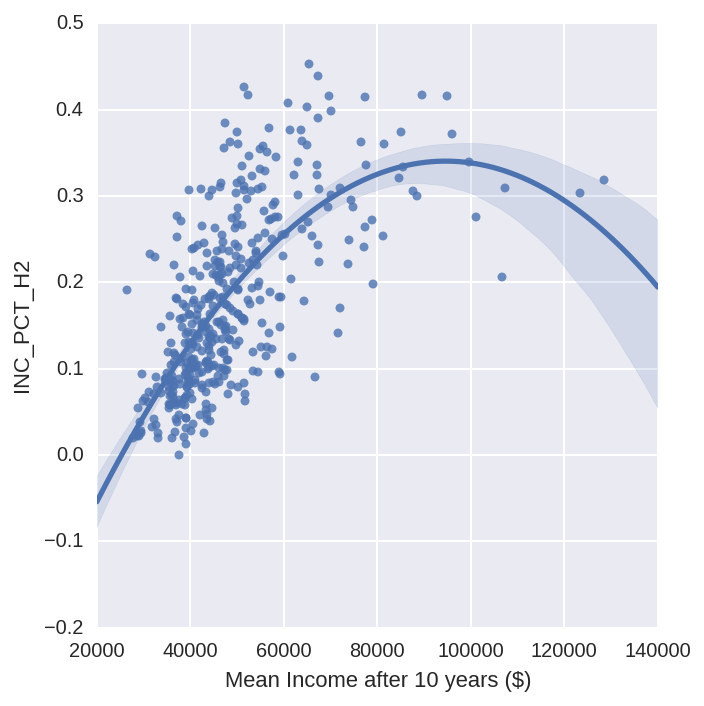

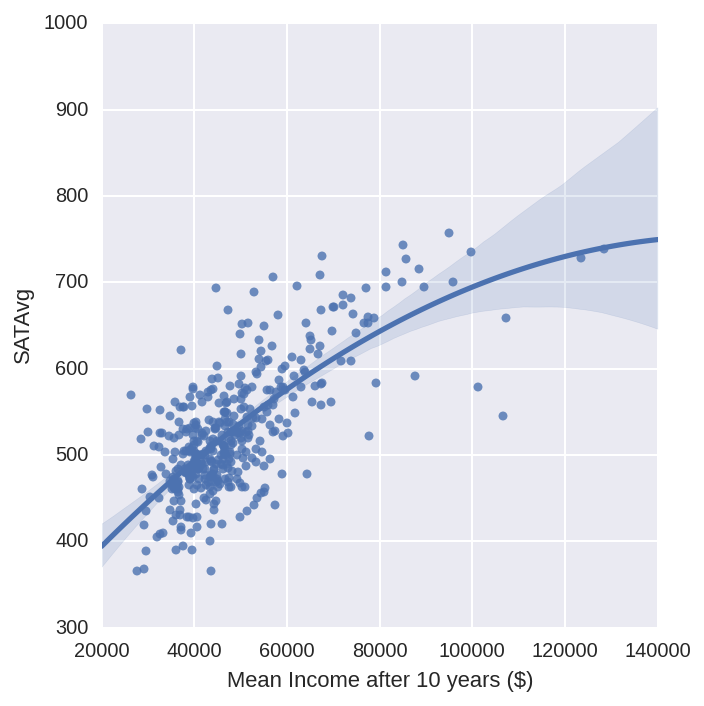

In [19]:
sns.set()
for name in features[1:]:
    sns.lmplot(x= 'E50' , y = name, data = modelData, order=2)
    #sns.lmplot(x= name , y = 'E50', data = modelData, hue = 'CollegeType')
    plt.xlabel('Mean Income after 10 years ($)')
    #fileName = "lm"+name+".png"
    #plt.savefig(fileName, bbox_inches = 'tight')

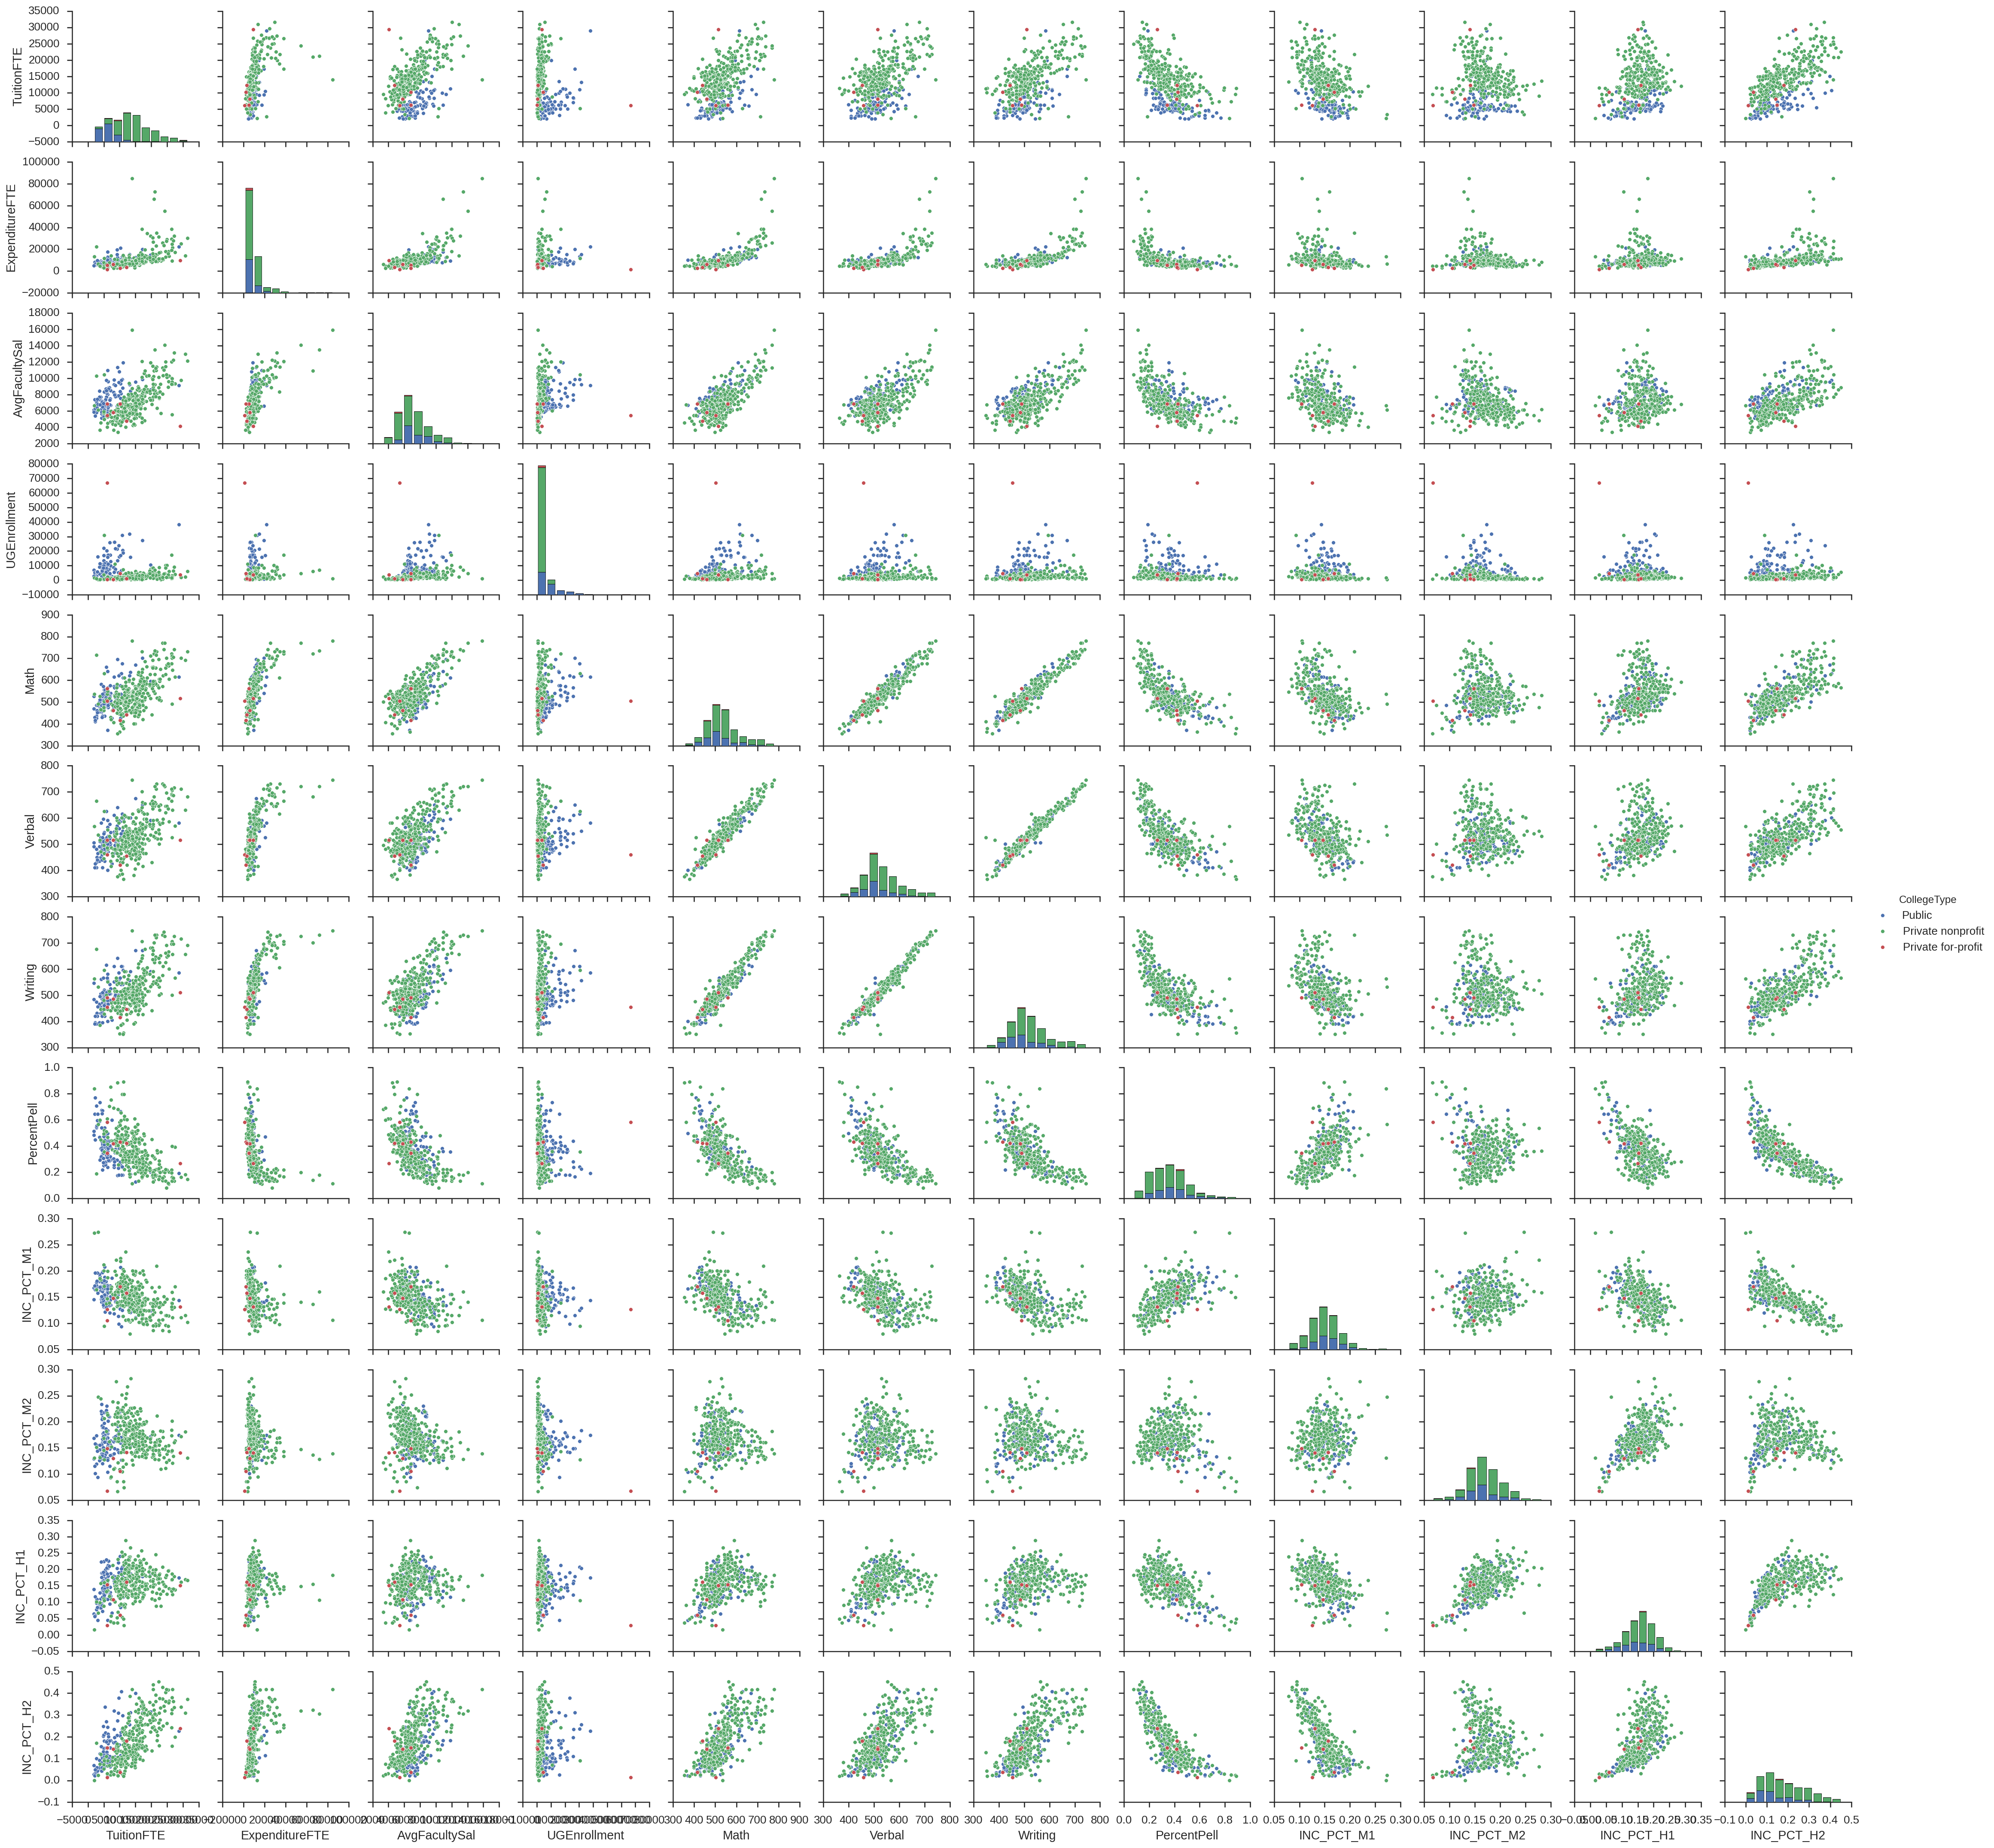

In [10]:
sns.pairplot(X, hue='CollegeType')

###  Data/Feature selection...
- Remove INC_PCT_M2...
    - This feature shows the least correlation to the median salary!
- Remove ExpenditureFTE - study it separately!
- The pairplot also shows good correlation between Math, Verbal and Writing SAT scores. Choose Math scores only!

In [69]:
modelData['SATAvg'] = modelData[['Math','Verbal','Writing']].mean(axis=1)

/opt/conda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [73]:
list(modelData.columns)

['UnivID',
 'College',
 'CollegeType',
 'Cost',
 'TuitionFTE',
 'ExpenditureFTE',
 'AvgFacultySal',
 'UGEnrollment',
 'Math',
 'Verbal',
 'Writing',
 'PercentPell',
 'MedianDebt',
 'INC_PCT_M1',
 'INC_PCT_M2',
 'INC_PCT_H1',
 'INC_PCT_H2',
 'E50',
 'SATAvg']

In [ ]:
features = [
 'Cost',
 'TuitionFTE',
 'ExpenditureFTE',
 'AvgFacultySal',
 'PercentPell',
 'MedianDebt',
 'INC_PCT_M1',
 'INC_PCT_M2',
 'INC_PCT_H1',
 'INC_PCT_H2',
 'SATAvg']
X = modelData[features]
y = modelData['E50']

In [83]:
features = [
 'Cost',
 'TuitionFTE',
 'ExpenditureFTE',
 'AvgFacultySal',
 'PercentPell',
 'MedianDebt',
 'INC_PCT_M2',
 'INC_PCT_H2',
 'SATAvg']
X = modelData[features]
y = modelData['E50']

In [84]:
print type(X), X.shape
print type(y), y.shape

<class 'pandas.core.frame.DataFrame'> (411, 9)
<class 'pandas.core.series.Series'> (411,)


In [85]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import LeaveOneOut

### Use cross-validation to visualize prediction errors...

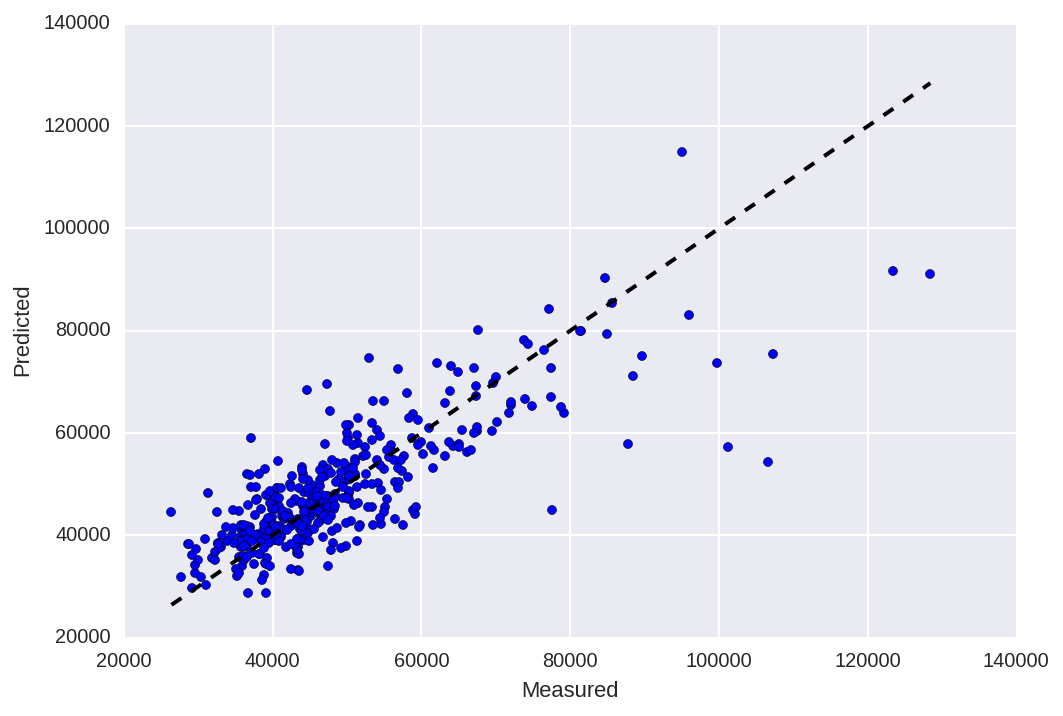

In [86]:
LinReg = LinearRegression()
#Cross-validate!
y_pred = cross_val_predict(LinReg, X, y, cv=20)

fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [87]:
LinReg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
print 'Coefficients: '+ '\n', LinReg.coef_
print "Residual sum of squares: %.2f" % np.mean((LinReg.predict(X) - y) ** 2)
print 'Variance score:          %.2f' % LinReg.score(X, y)
print 'Intercept:               %.2f' % LinReg.intercept_

Coefficients: 
[  7.22001550e-02   2.04400415e-01   3.24036679e-01   2.98189167e+00
  -6.29039167e+03   1.53428140e-01  -1.24022968e+04   4.08472579e+03
   2.67254725e+01]
Residual sum of squares: 64704324.10
Variance score:          0.68
Intercept:               5931.11


In [112]:
LRModelResults = pd.DataFrame(zip(features, LinReg.coef_), columns=['Features', 'Estimated co-efficients'])
LRModelResults

Features  Estimated co-efficients
0            Cost                 0.072200
1      TuitionFTE                 0.204400
2  ExpenditureFTE                 0.324037
3   AvgFacultySal                 2.981892
4     PercentPell             -6290.391674
5      MedianDebt                 0.153428
6      INC_PCT_M2            -12402.296829
7      INC_PCT_H2              4084.725793
8          SATAvg                26.725473

 |Features|Estimated co-efficients
:-:|:-------|:----------
1 |Cost|0.072200
2|TuitionFTE|0.204400
3|	ExpenditureFTE|	0.324037
4|	AvgFacultySal	|2.981892
5|	PercentPell	|-6290.391674
6|	MedianDebt	|0.153428
7|	INC_PCT_M2	|-12402.296829
8|	INC_PCT_H2|	4084.725793
9|	SATAvg	|26.725473

### Normalize the data?

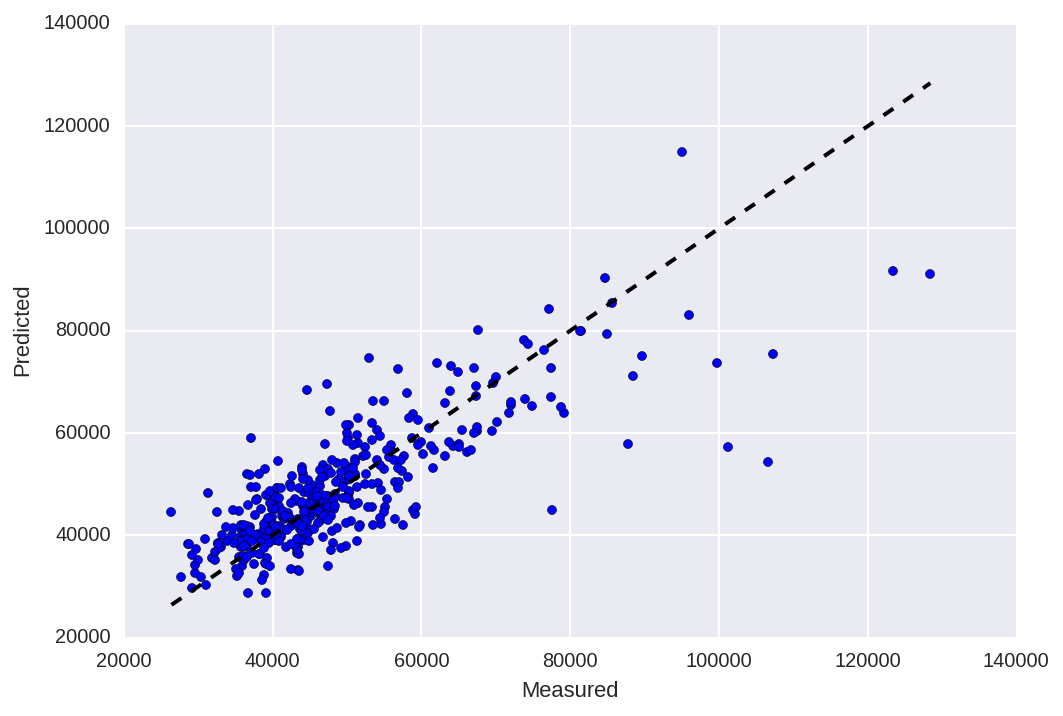

In [90]:
LinReg1 = LinearRegression(normalize=True)
#Cross-validate!
y_pred = cross_val_predict(LinReg1, X, y, cv=20)

fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Conduct a LinearRegression & RidgeCV

In [93]:
from sklearn import preprocessing
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [110]:
ridge = RidgeCV(cv = 20)
ridge.fit(X,y)

RidgeCV(alphas=array([  0.1,   1. ,  10. ]), cv=20, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [111]:
print 'Coefficients: '+ '\n', ridge.coef_
print "Residual sum of squares: %.2f" % np.mean((ridge.predict(X) - y) ** 2)
print 'Variance score:          %.2f' % ridge.score(X, y)
print 'Intercept:               %.2f' % ridge.intercept_

Coefficients: 
[  6.99161281e-02   2.24122712e-01   3.21462805e-01   3.07860054e+00
  -4.64676981e+03   1.49997109e-01  -3.19044191e+03   3.22804663e+03
   2.77639742e+01]
Residual sum of squares: 64801143.55
Variance score:          0.68
Intercept:               2594.04


In [113]:
RidgeCVResults = pd.DataFrame(zip(features, ridge.coef_), columns=['Features', 'Estimated co-efficients'])
RidgeCVResults

Features  Estimated co-efficients
0            Cost                 0.069916
1      TuitionFTE                 0.224123
2  ExpenditureFTE                 0.321463
3   AvgFacultySal                 3.078601
4     PercentPell             -4646.769811
5      MedianDebt                 0.149997
6      INC_PCT_M2             -3190.441912
7      INC_PCT_H2              3228.046629
8          SATAvg                27.763974

No. |	Features	|Estimated co-efficients
:--:|-:-------------|-:---------------------
0	|Cost	|0.069916
1	|TuitionFTE	|0.224123
2	|ExpenditureFTE	|0.321463
3	|AvgFacultySal	|3.078601
4	|PercentPell	|-4646.769811
5	|MedianDebt	|0.149997
6	|INC_PCT_M2	|-3190.441912
7	|INC_PCT_H2	|3228.046629
8	|SATAvg	|27.763974

In [122]:
def pandas_df_to_markdown_table(df):
    from IPython.display import Markdown, display
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=cols)
    df_formatted = pd.concat([df_fmt, df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))

pandas_df_to_markdown_table(RidgeCVResults)

Features|Estimated co-efficients
---|---
Cost|0.06991612812561199
TuitionFTE|0.22412271180077697
ExpenditureFTE|0.3214628053513799
AvgFacultySal|3.0786005403684147
PercentPell|-4646.769811145033
MedianDebt|0.14999710852425682
INC_PCT_M2|-3190.4419120747943
INC_PCT_H2|3228.0466286507394
SATAvg|27.763974182956364


In [ ]:
y_pred = ridge.predict(X)
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured Salary')
ax.set_ylabel('Predicted Salary')
#plt.savefig("FinalRidgeModel.png")

In [102]:
# Fit estimators
ESTIMATORS = {
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(alphas=(0.1, 1.0, 10.0), cv=20),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)


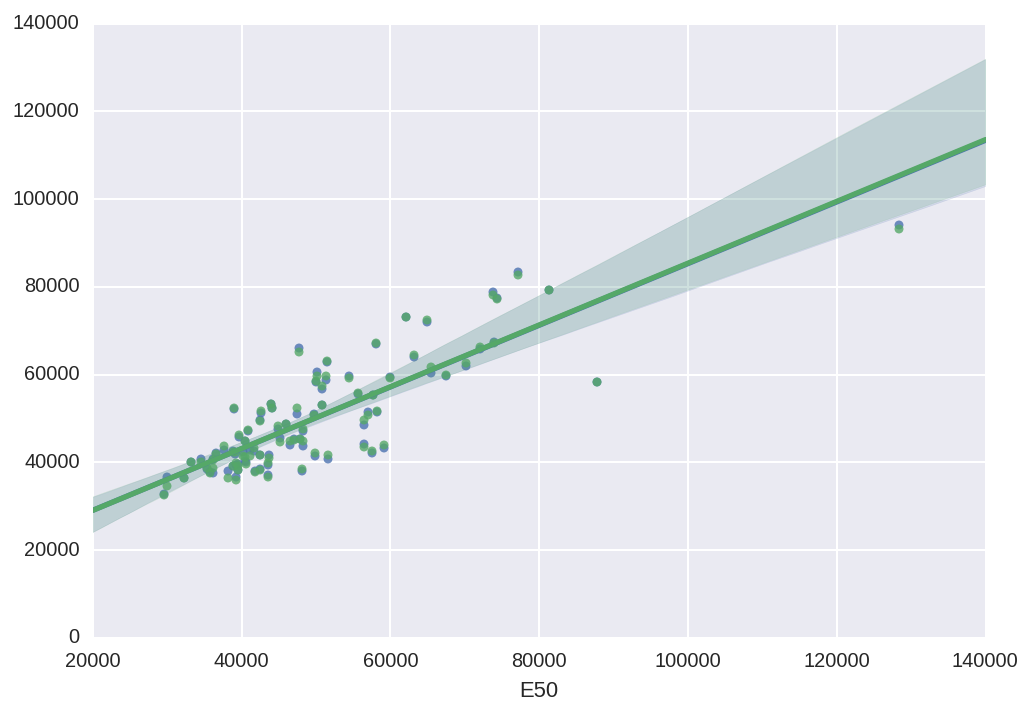

In [104]:
for estimator in y_test_predict.keys():
    sns.regplot(x=y_test, y = y_test_predict[estimator], label=estimator)